# How to Analyze connectivity patterns in Trained RNNs

This code is designed to analyze neural network models by examining connectivity patterns and eigenvalues. It iterates through the files in a specified directory, loading and compiling models from files that match a particular pattern. It extracts and manipulates weights from the layers of the loaded model. The code plots connectivity matrices based on these weights and saves the plots. It also computes eigenvalues and eigenvectors of the connectivity matrix, performing additional calculations and generating related plots.

In [ ]:
from google.colab import files
from google.colab import drive
import os
import sys
drive.mount('/content/gdrive', force_remount=True)
sys.path.append('/content/gdrive/My Drive/Neuro-Academy-Poland')

Mounted at /content/gdrive


In [ ]:
import os, time
import fnmatch
#Numpy, matplotlib, scipy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from pylab import grid
from scipy.stats import norm
from numpy import linalg as LA
from numpy.random import seed
#Keras & Tensorflow
from keras.models import Sequential,load_model
from keras.layers import TimeDistributed, Dense, Activation, Dropout,SimpleRNN
from keras.utils import plot_model
from keras import metrics, optimizers, regularizers, initializers
from keras import backend as K
#scikit learn
from sklearn.decomposition import PCA
import sklearn.decomposition

_N_00_initial.hdf5
and_weights-01.hdf5
and_weights-02.hdf5
and_weights-03.hdf5
and_weights-04.hdf5
and_weights-05.hdf5
and_weights-06.hdf5
and_weights-07.hdf5
and_weights-08.hdf5
and_weights-09.hdf5
and_weights-10.hdf5
and_weights-11.hdf5
and_weights-12.hdf5
and_weights-13.hdf5
and_weights-14.hdf5
and_weights-15.hdf5
and_weights-16.hdf5
and_weights-17.hdf5
and_weights-18.hdf5
and_weights-19.hdf5
and_weights-20.hdf5
------------- 20
i-layer:  0
{'name': 'simple_rnn_4', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': (None, None, 2), 'return_sequences': True, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 50, 'activation': 'tanh', 'use_bias': False, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'recu

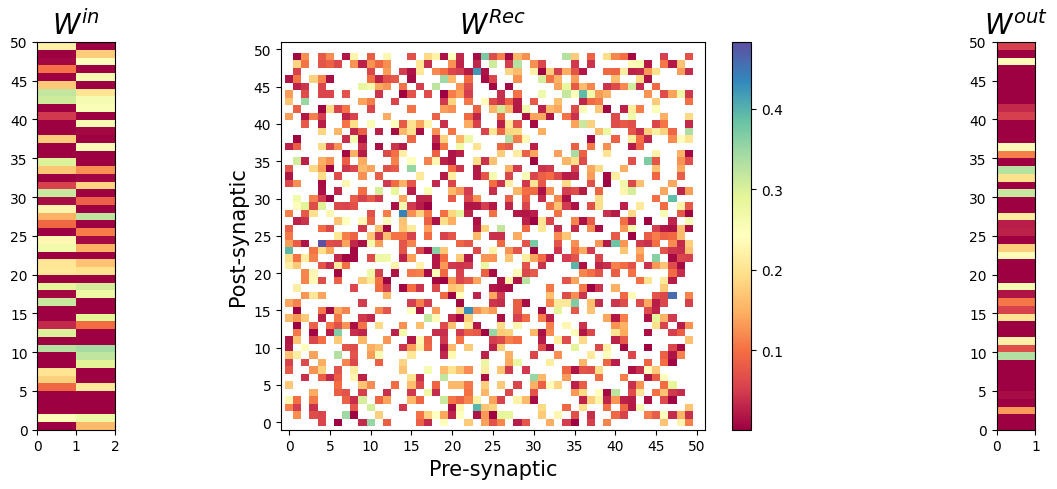

frecuency 0
list_dist sorted [(1.1411657+0j), (1.0399283+0j), (-1.0026742+0j), (-0.97367436+0j), (1.0296229+0.101821825j), (1.0296229-0.101821825j), (-0.97232807+0.17596295j), (-0.97232807-0.17596295j), (-0.9449533+0.27899346j), (-0.9449533-0.27899346j), (1.1055788+0.31480145j), (1.1055788-0.31480145j), (0.9095299+0.34091467j), (0.9095299-0.34091467j), (-0.9108614+0.3744849j), (-0.9108614-0.3744849j), (0.88958555+0.45120594j), (0.88958555-0.45120594j), (-0.8189912+0.49356586j), (-0.8189912-0.49356586j), (-0.85161245+0.5316211j), (-0.85161245-0.5316211j), (0.77471906+0.60794836j), (0.77471906-0.60794836j), (0.72998106+0.6875092j), (0.72998106-0.6875092j), (-0.6984799+0.72108096j), (-0.6984799-0.72108096j), (-0.60900164+0.7282408j), (-0.60900164-0.7282408j), (0.6199582+0.79820496j), (0.6199582-0.79820496j), (0.49810344+0.8300347j), (0.49810344-0.8300347j), (-0.5301416+0.8395966j), (-0.5301416-0.8395966j), (-0.28728622+0.9279028j), (-0.28728622-0.9279028j), (0.34564766+0.9406051j), (0.345

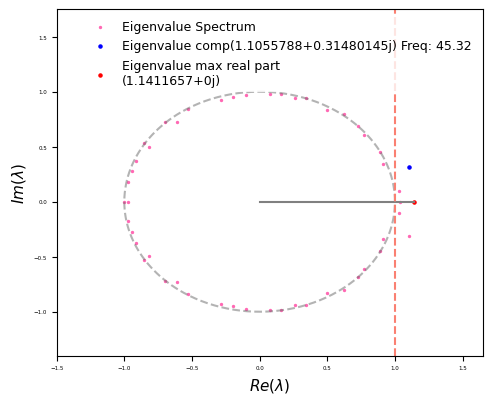

In [ ]:
r_dir  = '/content/gdrive/My Drive/Neuro-Academy-Poland/weights/weights_N_50_gap_0'
plot_dir='/content/gdrive/My Drive/Neuro-Academy-Poland/plots'
N_rec   =50

for root, sub, files in os.walk(r_dir):
    files = sorted(files)
    for i,f in enumerate(files):
        print(f)
        if  fnmatch.fnmatch(f, '*20.hdf5'):
           r_dir      =root
           string_name=root[-23:-7]
           #model
           model = Sequential()
           model = load_model(r_dir+"/"+f)
           # Compiling model:
           model.compile(loss = 'mse', optimizer='Adam', sample_weight_mode="temporal")

           print("-------------",i)

           for jj, layer in enumerate(model.layers):
               print("i-layer: ",jj)
               print(layer.get_config(), layer.get_weights())

           pesos     = model.layers[0].get_weights()
           pesos__   = model.layers[0].get_weights()[0]
           pesos_in  = pesos[0]
           pesos_out = model.layers[1].get_weights()
           pesos     = model.layers[0].get_weights()[1]
           N_rec     = len(pesos_in[0])
           neurons   = N_rec
           colors    = cm.rainbow(np.linspace(0, 1, neurons+1))


           print("-------------\n-------------")
           print("Units:",N_rec)
           unidades        = np.arange(len(pesos))
           conection       = pesos
           conection_usar  =c onection
           peso_mask      = 0.001
           model.layers[0].set_weights([pesos_in,conection_usar])
           conection_pos = np.ma.masked_where(conection_usar < peso_mask, conection)

           #################Conectivity matrix: positive or excitatory weights ##########

           fig2= plt.figure(figsize=(15,5))
           import matplotlib.colors as clr
           from matplotlib.colors import BoundaryNorm
           ax =[]

           cbar_max  = 1
           cbar_min  =-1
           cbar_step =0.025
           out       =pesos_out[0]

           # define the colormap
           cmap = plt.get_cmap('Spectral')
           cmaplist = [cmap(i) for i in range(cmap.N)]
           # create the new map
           cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

           # define the bins and normalize and forcing 0 to be part of the colorbar!
           bounds = np.arange(np.min(conection_pos),np.max(conection_pos),.05)
           idx    = np.searchsorted(bounds,0)
           bounds = np.insert(bounds,idx,0)
           norm_  = BoundaryNorm(bounds, cmap.N)

           cmap.set_bad(color='white')
           ## W in
           ax.append(fig2.add_subplot(1,3,1))
           plt.title(r'$W^{in}$', fontsize = 20)
           im1=plt.imshow(pesos_in.T, cmap=cmap,interpolation="none",label=r'$W^{in}$',extent=[0,2,0,50],aspect='0.2',vmin =np.min(conection_pos), vmax = np.max(conection_pos))
           plt.xticks(np.arange(0,3, 1))
           plt.yticks(np.arange(0,N_rec +1, 5))
           ## Wrec
           ax.append(fig2.add_subplot(1,3,2))
           plt.title(r'$W^{Rec}$', fontsize = 20)

           im=plt.imshow(conection_pos,interpolation='none',cmap=cmap,label='Conection matrix with', aspect="auto",vmin =np.min(conection_pos), vmax = np.max(conection_pos))

           plt.xlim([-1,N_rec +1])
           plt.ylim([-1,N_rec +1])
           plt.xticks(np.arange(0,N_rec +1, 5))
           plt.yticks(np.arange(0,N_rec +1, 5))
           plt.ylabel('Post-synaptic',fontsize = 15)
           plt.xlabel('Pre-synaptic',fontsize = 15)
           plt.colorbar(im, orientation='vertical')

           ### W out
           ax.append(fig2.add_subplot(1,3,3))
           plt.title(r'$W^{out}$', fontsize = 20)
           im3=plt.imshow(out, cmap=cmap,interpolation="none",label= r'$W^{out}$',extent=[0,1,0,50],aspect='0.2',vmin =np.min(conection_pos), vmax = np.max(conection_pos))
           plt.xticks(np.arange(0,2, 1))
           plt.yticks(np.arange(0,N_rec +1, 5))
           fig2.tight_layout()
           plt.savefig(plot_dir+"/conection_matrix_P_"+str(i)+"_.png",dpi=200)
           plt.show()
           plt.close()

           w, v = LA.eig(conection_usar)

           #print("Eigenvlaues:\n", w)
           #print("Eigenvectors:\n",v)

           lista_dist  = np.c_[w,w.real]
           lista_dist_2= np.c_[w,abs(w.real)]
           maximo      = max(lista_dist, key=lambda item: item[1])

           maximo_2= max(lista_dist_2, key=lambda item: item[1])
           marcar  = maximo[0]
           marcar_2= maximo_2[0]

           frecuency=0
           if marcar_2.imag==0:
               frecuency =0
           else:
               frecuency =abs(float(marcar_2.imag)/(3.14159*float(marcar_2.real)))

           print( "frecuency",frecuency)

           lista_modulos_=np.sqrt(w.real*w.real+w.imag*w.imag)
           lista_freq_=1000*np.absolute(w.imag/(3.14159*w.real))
           w_2=list(w)

           list_dist_ordered=sorted(w_2, key=lambda x: abs(x.imag) )
           print("list_dist sorted", list_dist_ordered)
           j2 = [i for i in w_2 if abs(i.real*i.real+i.imag*i.imag) > 1 and i.imag!=0]

           if len(j2)>0:
               ultimo= max(j2,key= np.abs)# np.imag)
           else:
               ultimo =marcar_2

           frecuency_ultimo =1000*abs(float(ultimo.imag)/(2*3.14159*float(ultimo.real)))
           frecuency_ultimo_="%.2f" % frecuency_ultimo

           ################ Fig Eigenvalues ########################

           plt.figure(figsize=(5.5,4.5))
           plt.scatter(w.real,w.imag,color="hotpink",label="Eigenvalue Spectrum",s=2)
           plt.scatter(ultimo.real,ultimo.imag,color="blue",label="Eigenvalue comp"+str(ultimo)+ " Freq: "+str(frecuency_ultimo_),s=5)
           a = np.linspace(0, 2*np.pi, 500)
           cx,cy = np.cos(a), np.sin(a)
           plt.plot(cx, cy,'--', alpha=.5, color="dimgrey") # draw unit circle line
           plt.scatter(marcar.real,marcar.imag,color="red", label="Eigenvalue max real part \n" +str(marcar_2),s=5)
           plt.plot([0,marcar.real],[0,marcar.imag],'-',color="grey")
           plt.axvline(x=1,color="salmon",linestyle='--')
           plt.xticks(fontsize=4)
           plt.yticks(fontsize=4)
           plt.ylim([-1.4, 1.75])
           plt.xlim([-1.5, 1.65])
           plt.xlabel(r'$Re( \lambda)$',fontsize = 11)
           plt.ylabel(r'$Im( \lambda)$',fontsize = 11)
           leg = plt.legend(fontsize= 9,loc=1)
           leg.get_frame().set_linewidth(0.0)
           plt.savefig(plot_dir+"/autoval_"+str(i)+".png",dpi=200, bbox_inches = 'tight')
           plt.show()
           plt.close()


In [ ]:
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

def plot_sample(sample_number,input_number,neurons,x_train,y_train,model,seq_dur,i,plot_dir,f,string_name,mem_gap):

    frecuencias=[]

    seq_dur                        = len(x_train[sample_number, :, 0])
    test                           = x_train[sample_number:sample_number+1,:,:]
    colors                         = cm.rainbow(np.linspace(0, 1, neurons+1))
    y_pred                         = model.predict(test)

    ###################################
    # Status for the sample value at the layer indicated
    capa=0

    #First leyer:
    get_0_layer_output = K.function([model.layers[capa].input], [model.layers[capa].output])
    layer_output= get_0_layer_output([test])[capa]

    #Second leyer:
    get_1_layer_output = K.function([model.layers[capa].input], [model.layers[capa].output])
    layer_output_T       = layer_output.T
    #print("layer_output",layer_output_T)
    array_red_list       = []

    ####################################
    y_pred              = model.predict(test)

    # To generate the Populational Analysis

    for ii in np.arange(0,neurons,1):
        neurona_serie = np.reshape(layer_output_T[ii], len(layer_output_T[ii]))
        array_red_list.append(neurona_serie)

    array_red = np.asarray(array_red_list)
    sdv       = sklearn.decomposition.TruncatedSVD(n_components=2)
    sdv_3d    = sklearn.decomposition.TruncatedSVD(n_components=3)
    X_2d      = sdv.fit_transform(array_red.T)
    X_3d      = sdv_3d.fit_transform(array_red.T)
    pca       = PCA(n_components=3)
    X_pca_    = pca.fit(array_red)
    X_pca     = pca.components_

    ####################################

    print("------------")
    ordeno_primero_x=X_pca[0]
    ordeno_primero_y=X_pca[1]
    ordeno_primero_z=X_pca[2]

    ####################################
    # How many 3d angular views you want to define
    yy        = np.arange(70,80,10)
    kk=70

    fig     = plt.figure(figsize=cm2inch(19,7))
    ###
    plt.subplot(2, 2, 1)
    plt.plot(test[0,:,0],color='g',label='Input A')
    plt.plot(test[0,:,1],color='pink',label='Input B')
    plt.plot(y_train[sample_number,:, 0],color='grey',linewidth=3,label='Target Output')
    plt.plot(y_pred[0,:, 0], color='r',linewidth=2,label=' Output')
    plt.xlim(0,seq_dur+1)
    plt.ylim([-1.5, 1.5])
    plt.yticks([])
    plt.xticks(np.arange(0,seq_dur+1,50),fontsize = 8)
    plt.legend(fontsize= 5,loc=1)

    ###
    plt.subplot(2, 2, 3)
    plt.plot(test[0,:,0],color='g',label='Input A')
    plt.plot(test[0,:,1],color='pink',label='Input B')


    for ii in np.arange(0,int(neurons),1):

        plt.plot(layer_output_T[ii],color=colors[ii],linewidth=1)
        plt.xlim(-1,seq_dur+1)
        plt.ylim([-1.5, 1.5])
        plt.xlabel('time [mS]',fontsize = 10)
        plt.yticks([])
        plt.xticks(np.arange(0,seq_dur+1,50),fontsize = 8)
    plt.plot(y_pred[0,:, 0], color='r',linewidth=2,label=' Output\n 25 individual states')
    #plt.legend(fontsize= 3.5,loc=3)
    leg = plt.legend(fontsize= 5,loc=4)
    #leg.get_frame().set_linewidth(0.0)


    fig.suptitle("Time series and PCA 3D plot",fontsize = 12)
    ax = fig.add_subplot(122, projection='3d')

    x=X_pca[0]
    y=X_pca[1]
    z=X_pca[2]

    N=len(z)

    for ik in range(N-1):
        ax.plot(x[ik:ik+2], y[ik:ik+2], z[ik:ik+2], color=plt.cm.viridis(ik/N))
    ax.scatter(ordeno_primero_x[0],ordeno_primero_y[0],ordeno_primero_z[0],s=70,c='r',marker="^",label=' Start ')
    ax.scatter(ordeno_primero_x[-1],ordeno_primero_y[-1],ordeno_primero_z[-1],s=70,c='b',marker="^",label=' Stop ')
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    ax.set_zticks(())
    ax.view_init(elev=10, azim=kk)

    ax.legend(fontsize= 6)
    figname = str(plot_dir)+"/"+str(mem_gap)+"_Sample_"+str(sample_number)+"_pca_3D__ind_state_"+".png"
    plt.savefig(figname,dpi=300, bbox_inches = 'tight')
    plt.show()
    plt.close()

sample_number 0
1/1 [==============================] - 0s 34ms/step
------------


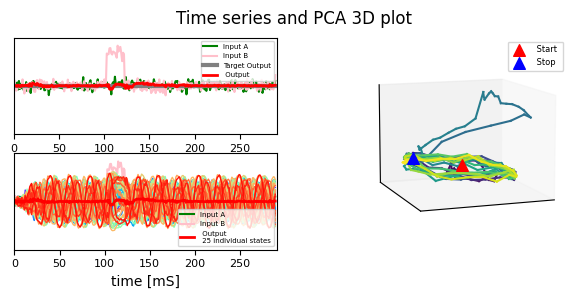

sample_number 1
1/1 [==============================] - 0s 26ms/step
------------


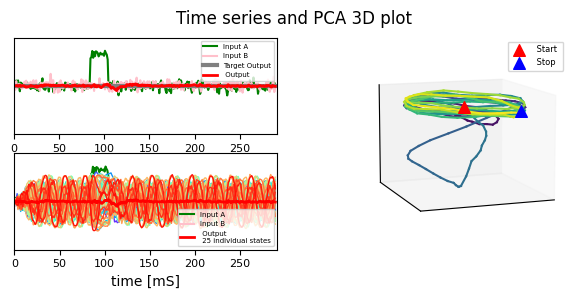

sample_number 2
1/1 [==============================] - 0s 28ms/step
------------


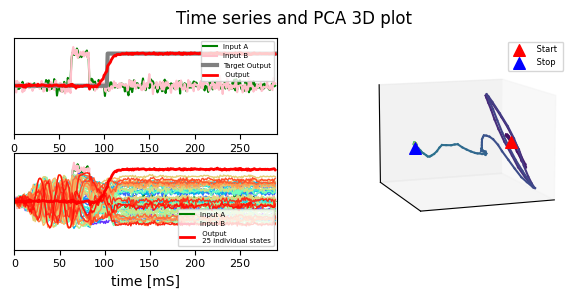

In [ ]:
seed_choice = 2
seed(seed_choice)

def generate_trials(size, mem_gap):
    seed(3)

    first_in         = 60   # to start the first stimulus
    stim_dur         = 20   # stimulus duration
    stim_noise       = 0.1  # noise level
    var_delay_length = 50   # for a variable starting point of the stimuli
    out_gap          = 140  # how much lenth add to the sequence duration
    sample_size      = size # sample size


    and_seed_A = 1*np.array([[0],[1],[0],[1]])
    and_seed_B = 1*np.array([[0],[0],[1],[1]])
    and_y      = 1* np.array([0,0,0,1])
    seq_dur    = first_in+stim_dur+mem_gap+var_delay_length+out_gap #Sequence duration

    if var_delay_length == 0:
        var_delay = np.zeros(sample_size, dtype=np.int)
    else:
        var_delay = np.random.randint(var_delay_length, size=sample_size) + 1
    second_in = first_in + stim_dur + mem_gap


    out_t       = mem_gap+ first_in+stim_dur
    trial_types = np.random.randint(4, size=sample_size)
    x_train     = np.zeros((sample_size, seq_dur, 2))
    x_train_    = np.zeros((sample_size, seq_dur, 2))
    y_train     =  np.zeros((sample_size, seq_dur, 1))

    for ii in np.arange(sample_size):
        x_train[ii, first_in+var_delay[ii]:first_in + stim_dur+var_delay[ii], 0] = and_seed_A[trial_types[ii], 0]
        x_train[ii, first_in+var_delay[ii]:first_in + stim_dur+var_delay[ii], 1] = and_seed_B[trial_types[ii], 0]

        y_train[ii, out_t + var_delay[ii]:, 0] = and_y[trial_types[ii]]

    mask = np.zeros((sample_size, seq_dur))
    for sample in np.arange(sample_size):
        mask[sample,:] = [1 for y in y_train[sample,:,:]]

    x_train = x_train +stim_noise * np.random.randn(sample_size, seq_dur, 2)
    return (x_train, y_train, mask,seq_dur)

x_train,y_train, mask,seq_dur  = generate_trials(10,20)

for sample_number in np.arange(3):

           print ("sample_number",sample_number)
           plot_samples = plot_sample(sample_number,2,neurons,x_train,y_train,model,seq_dur,i,plot_dir,f,string_name,20)